In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [10]:
matplotlib.rcParams["font.size"] = 14
matplotlib.rc('figure', figsize=(6, 7))

In [11]:
df = pd.read_csv("BankChurners.csv")

In [12]:
df = df.drop('Unnamed: 21', 1)
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


## Exploratory Data Analysis:

### How many percentage of customers are churned?

In [13]:
flag_num = [len(df)-len(df[df["Attrition_Flag"] == "Attrited Customer"]), len(df[df["Attrition_Flag"] == "Attrited Customer"])]

(-1.1096628881330064,
 1.1921589321532362,
 -1.106549115873852,
 1.106090157871072)

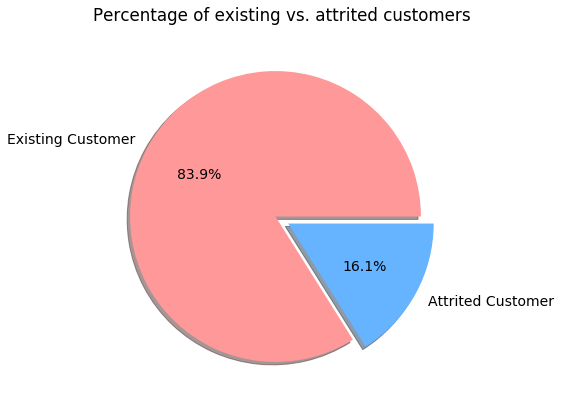

In [14]:
explode = (0, 0.1)
plt.pie(flag_num,explode=explode, labels=list(df["Attrition_Flag"].unique()),autopct='%1.1f%%', shadow=True, colors = ['#ff9999','#66b3ff']
)
plt.title('Percentage of existing vs. attrited customers')
plt.axis('equal')

### Female and male percentage of attrited and existing customer

In [16]:
all_attrited = df[df["Attrition_Flag"] == "Attrited Customer"]
all_existed = df[df["Attrition_Flag"] == "Existing Customer"]

Text(0.5, 1.0, 'Percentage of female vs. male in existing customers')

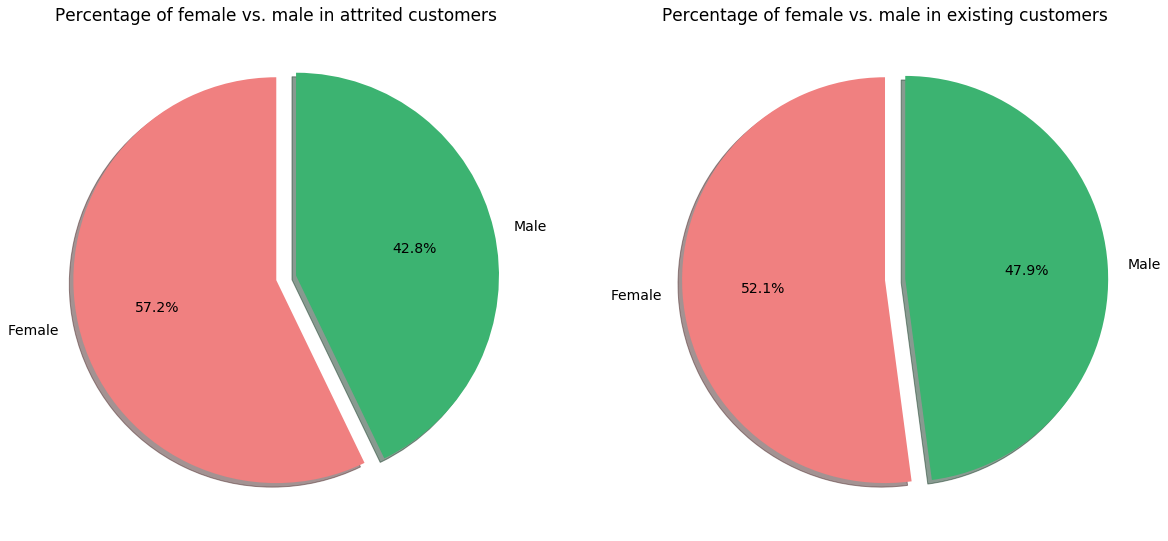

In [17]:
flag_num = [len(all_attrited[all_attrited["Gender"] == "F"]), len(all_attrited[all_attrited["Gender"] == "M"])]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

ax1.pie(flag_num,labels=['Female', 'Male'],explode=explode, autopct='%1.1f%%', startangle = 90, shadow=True, colors = ['lightcoral','mediumseagreen'])
ax1.set_title('Percentage of female vs. male in attrited customers', fontsize=17)

flag_num = [len(all_existed[all_existed["Gender"] == "F"]), len(all_existed[all_existed["Gender"] == "M"])]
ax2.pie(flag_num,labels=['Female', 'Male'],explode=explode, autopct='%1.1f%%', startangle = 90, shadow=True, colors = ['lightcoral','mediumseagreen'])
ax2.set_title('Percentage of female vs. male in existing customers', fontsize=17)

* In attrited customers, **57.2%** of them are female and **42.8%** of them are male.
* In existing customers **52.1%** of them are female and **47.9%** of them are male. 

### Dependent_count, Education_level, Income_category, Card_category

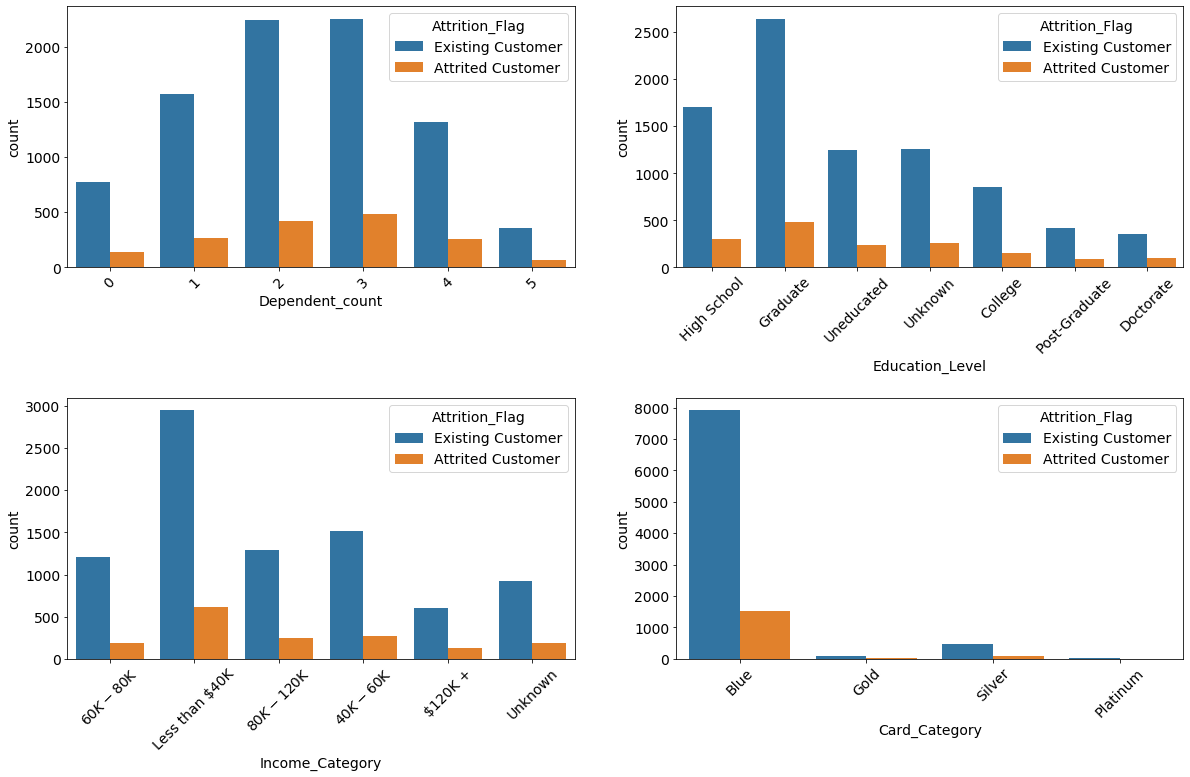

In [19]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Dependent_count', hue = 'Attrition_Flag',data = df, ax=axarr[0][0])
sns.countplot(x='Education_Level', hue = 'Attrition_Flag',data = df, ax=axarr[0][1])
sns.countplot(x='Card_Category', hue = 'Attrition_Flag',data = df, ax=axarr[1][1])
sns.countplot(x='Income_Category', hue = 'Attrition_Flag',data = df, ax=axarr[1][0])
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

### Marital_Status, Customer_Age

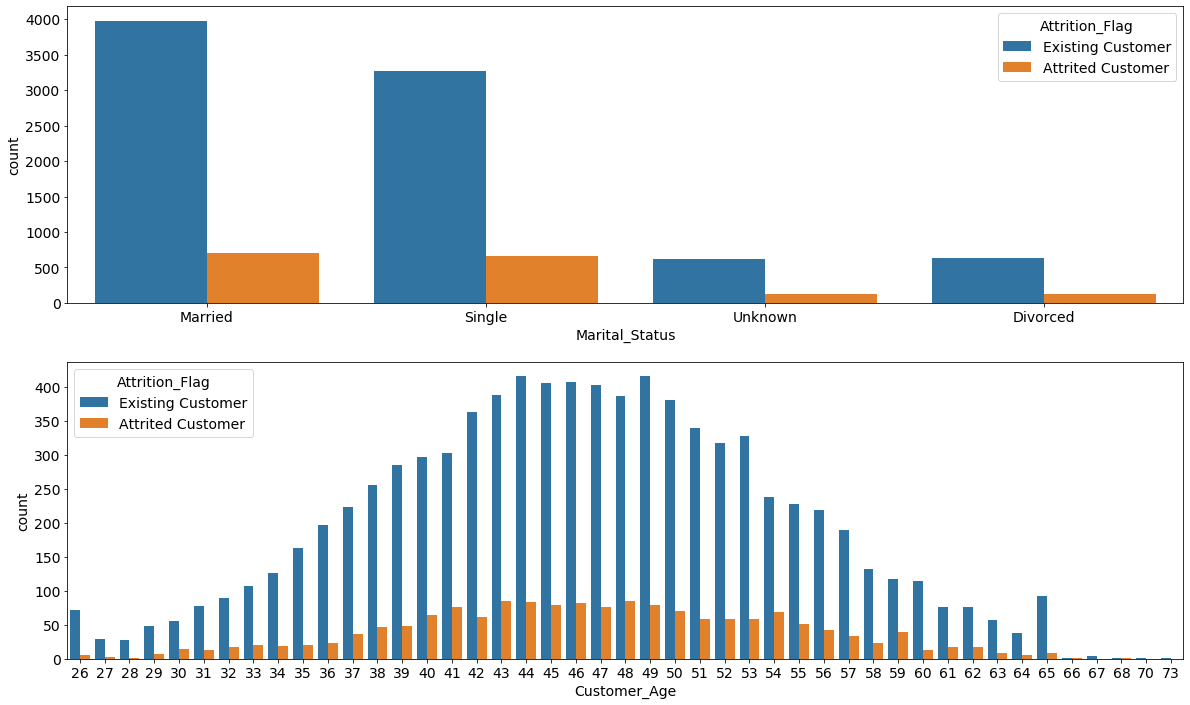

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
sns.countplot(x='Marital_Status', hue = 'Attrition_Flag',data = df, ax=ax1)
sns.countplot(x='Customer_Age', hue = 'Attrition_Flag',data = df, ax=ax2)

### Months_Inactive_12_mon

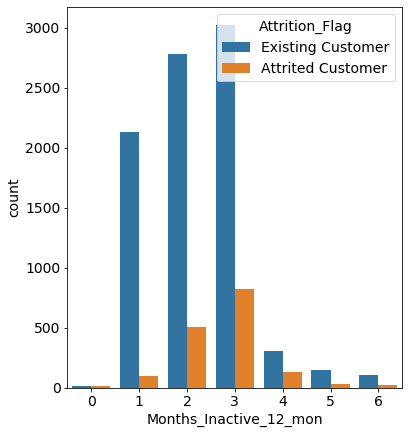

In [22]:
fig, ax = plt.subplots()
sns.countplot(x='Months_Inactive_12_mon', hue = 'Attrition_Flag',data = df, ax=ax)

### Credit_Limit

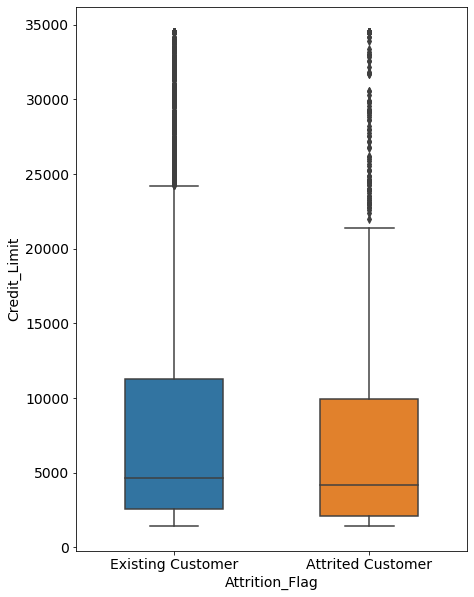

In [23]:
fig, ax = plt.subplots(figsize=(7,10))
sns.boxplot(data=df, y='Credit_Limit', x='Attrition_Flag', width=0.5, ax=ax)

### Odds ratio of Gender, Months_Inactive_12_mon, Card_Category

In [24]:
all_categ = df[["Attrition_Flag", "Gender", "Dependent_count", "Education_Level", "Income_Category", "Card_Category", "Marital_Status", "Months_Inactive_12_mon"]]
grouped = all_categ.melt(id_vars='Attrition_Flag', var_name='key', value_name='value')
def col_choosen(col):
    table = grouped[grouped["key"] == col]
    table = table[["Attrition_Flag", "value"]]
    result = sm.stats.Table.from_data(table)
    return result.table_orig

In [26]:
#Gender
print(col_choosen("Gender"), "\n")
rank1 = 697/4072
rank2 = 930/4428
print("odds ratio: ", rank2/rank1)

value                 F     M
Attrition_Flag               
Attrited Customer   930   697
Existing Customer  4428  4072 

odds ratio:  1.2270162873795167


* If the customer is a female, the chance of her to be attrited is **122%** that of male customer.

In [28]:
#Months_Inactive_12_mon
isolated = col_choosen("Months_Inactive_12_mon")
isolated["low_month_inactive"] = isolated[0] + isolated[1] +isolated[2]
isolated["high_month_inactive"] = isolated[3] + isolated[4] +isolated[5]+ isolated[6]
isolated = isolated[["low_month_inactive", "high_month_inactive"]]
print(isolated, "\n")
rank1 = 620/4924
rank2 = 1007/3576
print("odds ratio: ", rank2/rank1)

value              low_month_inactive  high_month_inactive
Attrition_Flag                                            
Attrited Customer                 620                 1007
Existing Customer                4924                 3576 

odds ratio:  2.236445478819369


* If the customer doesn't use the credit card for a longer period, the chance of him or her to be attrited is **223%** that of more active customer.

In [29]:
#Card_Category
isolated = col_choosen("Card_Category")
isolated["low_level"] = isolated["Blue"] + isolated["Silver"]
isolated["high_level"] = isolated["Gold"] + isolated["Platinum"]
isolated = isolated[["low_level", "high_level"]]
print(isolated, "\n")
rank1 = 1601/8390
rank2 = 26/110
print("odds ratio: ", rank2/rank1)

value              low_level  high_level
Attrition_Flag                          
Attrited Customer       1601          26
Existing Customer       8390         110 

odds ratio:  1.2386576571461019


* If the customer has a less prestigious credit card, the chance of him or her to be attrited is **124%** that of customer with card of highest level of prestige.

### Correlation ammong variables

In [30]:
df = df.drop('CLIENTNUM', 1)

In [31]:
for i in range(len(df)):
    if df.loc[i, "Attrition_Flag"] == 'Attrited Customer':
        df.loc[i, 'Attrition_Flag'] = int(1)
    elif df.loc[i, "Attrition_Flag"] != 'Attrited Customer':
        df.loc[i, 'Attrition_Flag'] = int(0)
        
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

Correlation of attrition flag (attrited/ existing) and other variables:  

Attrition_Flag              1.00
Total_Trans_Ct              0.37
Total_Ct_Chng_Q4_Q1         0.29
Total_Revolving_Bal         0.26
Contacts_Count_12_mon       0.20
Avg_Utilization_Ratio       0.18
Total_Trans_Amt             0.17
Months_Inactive_12_mon      0.15
Total_Relationship_Count    0.15
Total_Amt_Chng_Q4_Q1        0.13
Credit_Limit                0.02
Dependent_count             0.02
Customer_Age                0.02
Months_on_book              0.01
Avg_Open_To_Buy             0.00
Name: Attrition_Flag, dtype: float64


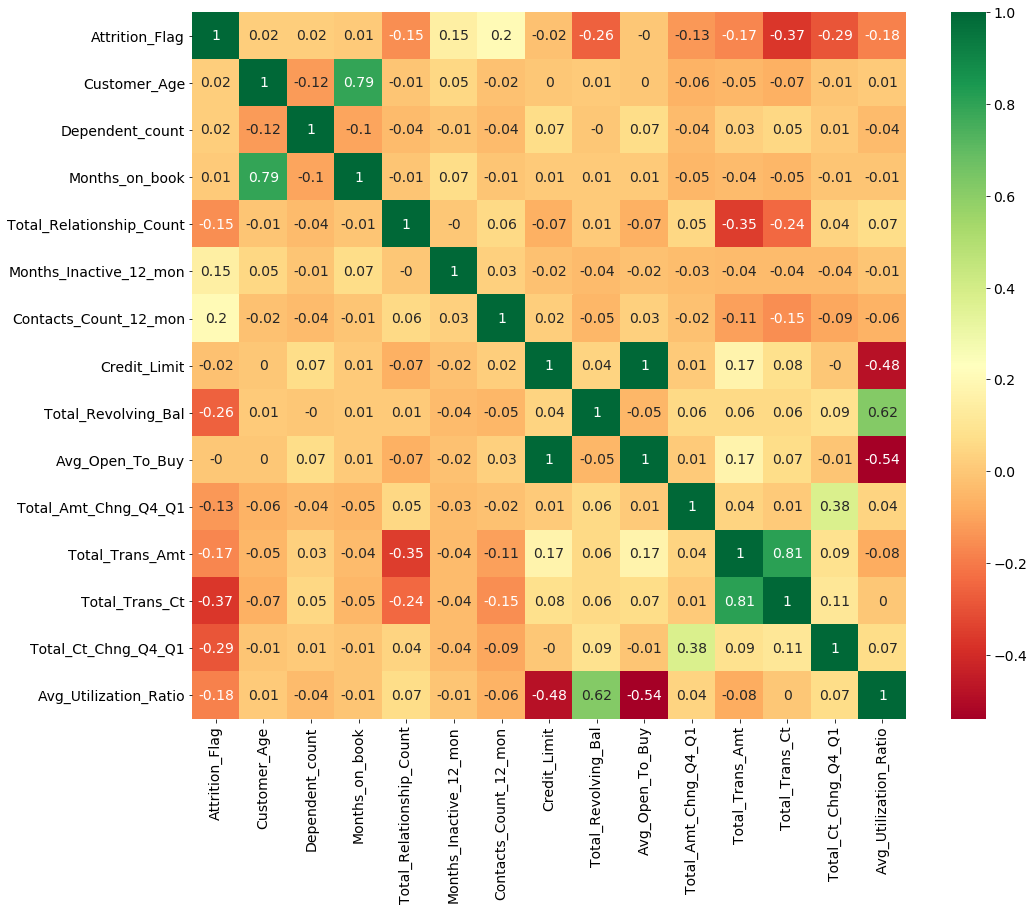

In [35]:
corr = df.corr().round(2)
plt.figure(figsize=(16,13))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
print("Correlation of attrition flag (attrited/ existing) and other variables: ", "\n")
print(abs(corr['Attrition_Flag']).sort_values(ascending = False))

* **Total_Trans_Ct** (Total Transaction Count (Last 12 months)), **Total_Ct_Chng_Q4_Q1** (Change in Transaction Count (Q4 除以 Q1)), and **Total_Revolving_Bal** (Total remaining balance) are the top three variables thst have the highest correlation coeeficient with Attrition_Flag. 

#### Inner correlation of the top three variables that have the highest correlation with Attrition_Flag

In [21]:
print("The correlation of total transaction count and change in transcation count is", corr["Total_Trans_Ct"]["Total_Ct_Chng_Q4_Q1"])
print("The correlation of total transaction count and total remaining balance is", corr["Total_Trans_Ct"]["Total_Revolving_Bal"])
print("The correlation of change in transcation count and total remaining balance is", corr["Total_Ct_Chng_Q4_Q1"]["Total_Revolving_Bal"])


The correlation of total transaction count and change in transcation count is 0.11
The correlation of total transaction count and total remaining balance is 0.06
The correlation of change in transcation count and total remaining balance is 0.09


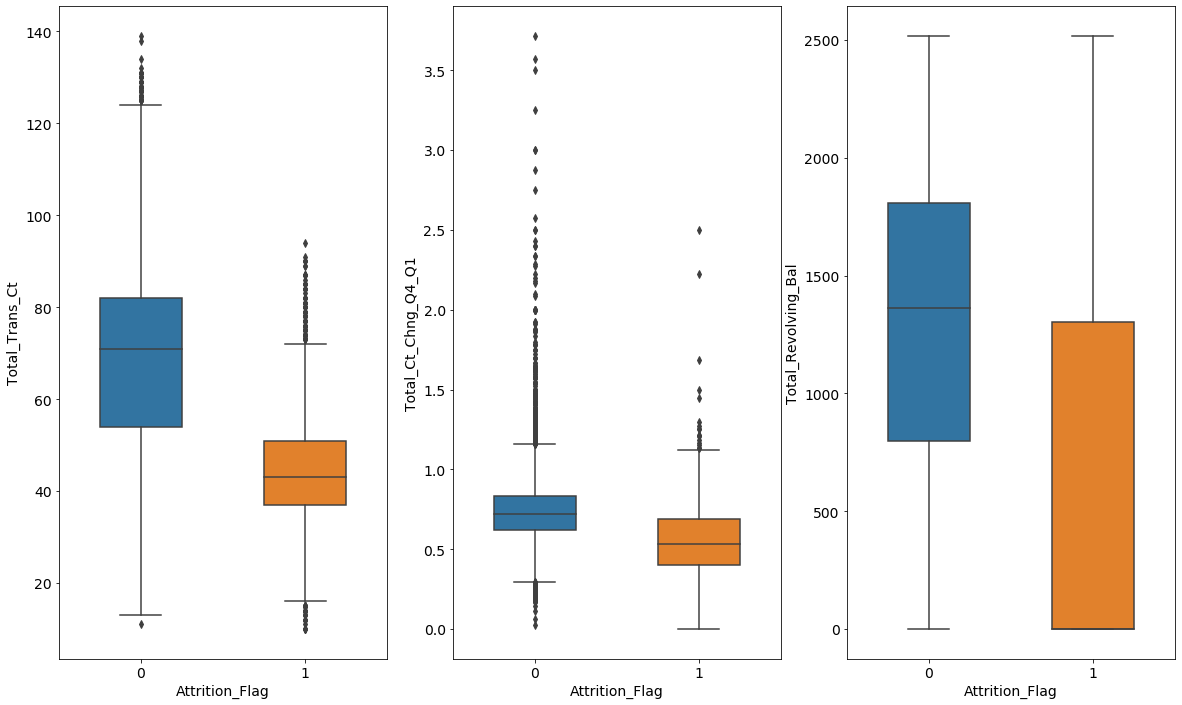

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 12))
sns.boxplot(data=df, y='Total_Trans_Ct', x='Attrition_Flag', width=0.5, ax=ax1)
sns.boxplot(data=df, y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag', width=0.5, ax=ax2)
sns.boxplot(data=df, y='Total_Revolving_Bal', x='Attrition_Flag', width=0.5, ax=ax3)


# Modeling:

In [37]:
#Encoding
df.dtypes[df.dtypes == object]

Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [38]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [39]:
#Gender
df = pd.get_dummies(df, columns=["Gender"])

In [40]:
#Marital_Status
df = pd.get_dummies(df, columns=["Marital_Status"])

In [41]:
#Card_Category
encoder = OrdinalEncoder(categories=[["Blue", "Silver", "Gold", "Platinum"]])
df["Card_Category"] = encoder.fit_transform(df[["Card_Category"]])

In [42]:
#Education_Level
encoder = OrdinalEncoder(categories=[["Unknown", "Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate"]])
df["Education_Level"] = encoder.fit_transform(df[["Education_Level"]])

In [43]:
#Income_Category
encoder = OrdinalEncoder(categories=[["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]])
df["Income_Category"] = encoder.fit_transform(df[["Income_Category"]])

In [44]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,45,3,2.0,3.0,0.0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,0,49,5,4.0,1.0,0.0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,0,51,3,4.0,4.0,0.0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,0,40,4,2.0,1.0,0.0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,0,40,3,1.0,3.0,0.0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [45]:
# Train test split
x_col = list(df.columns)
x_col.remove('Attrition_Flag')
y = df['Attrition_Flag']
X = df[x_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

len(X_train), len(X_test), len(y_train), len(y_test)

(7595, 2532, 7595, 2532)

In [46]:
# Oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
len(X_train_over), len(y_train_over)

(12750, 12750)

In [47]:
# Undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
len(X_train_under), len(y_train_under)

(2440, 2440)

In [48]:
# SMOTE and Undersampling
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_both, y_train_both = pipeline.fit_resample(X_train, y_train)

len(X_train_both), len(y_train_both)

(3825, 3825)

In [50]:
# only SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
len(X_train_smote), len(y_train_smote)

(12750, 12750)

In [51]:
# both Oversampling and Undersampling
#over = RandomOverSampler(sampling_strategy=0.2)
#X_train_both, y_train_both = over.fit_resample(X_train, y_train)

#under = RandomUnderSampler(sampling_strategy=0.5)
#X_train_both, y_train_both = under.fit_resample(X_train_both, y_train_both)

#len(X_train_both), len(y_train_both)

In [52]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

After experimenting, I found out that SMOTE combining with undersampling to be most effective. 

### DecisionTreeClassifier

Decision tree cross validation score: 0.861 (0.018) 

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2125
           1       0.69      0.86      0.77       407

    accuracy                           0.92      2532
   macro avg       0.83      0.89      0.86      2532
weighted avg       0.93      0.92      0.92      2532
 

Accuracy score:  0.9158767772511849 

AUROC:  0.8942627547333429 



Text(0.5, 1, 'DecisionTreeClassifier Confusion matrix')

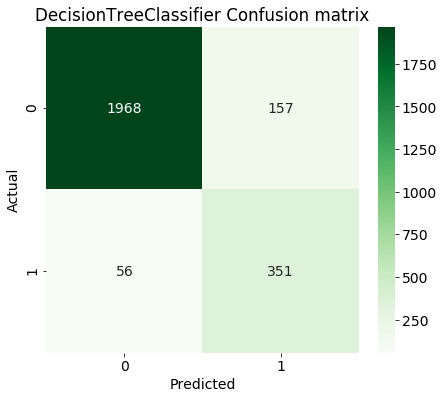

In [53]:
# DecisionTreeClassifier, feature importance, and confusion matrix
clf_d = DecisionTreeClassifier()
clf_d.fit(X_train_both, y_train_both)
predicted = clf_d.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(clf_d, X_train_both, y_train_both, scoring='f1', cv=cv)
print('Decision tree cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)), "\n")
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, clf_d.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DecisionTreeClassifier Confusion matrix")

Feature: 0, Score: 0.02517
Feature: 1, Score: 0.00276
Feature: 2, Score: 0.00126
Feature: 3, Score: 0.00350
Feature: 4, Score: 0.00210
Feature: 5, Score: 0.01047
Feature: 6, Score: 0.05823
Feature: 7, Score: 0.01274
Feature: 8, Score: 0.01209
Feature: 9, Score: 0.01621
Feature: 10, Score: 0.14021
Feature: 11, Score: 0.01895
Feature: 12, Score: 0.05906
Feature: 13, Score: 0.17314
Feature: 14, Score: 0.39282
Feature: 15, Score: 0.05347
Feature: 16, Score: 0.00969
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00098
Feature: 20, Score: 0.00453
Feature: 21, Score: 0.00147
Feature: 22, Score: 0.00113


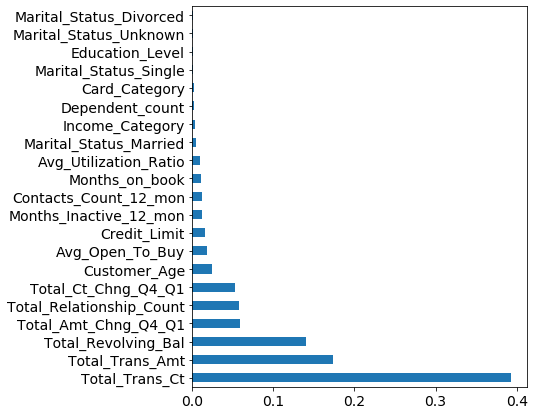

In [54]:
importance = clf_d.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

feat_importances = pd.Series(clf_d.feature_importances_, index=X_train_both.columns)
feat_importances.nlargest(21).plot(kind='barh')

For feature importance of fitting a **DecisionTreeClassifier**, the most important features are **Total_Trans_Ct** > **Total_Trans_Amt** > **Total_Revolving_Bal**.

### RandomForestClassifier

Random Forest Classifier cross validation score: 0.908 (0.016) 

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2125
           1       0.84      0.90      0.87       407

    accuracy                           0.96      2532
   macro avg       0.91      0.93      0.92      2532
weighted avg       0.96      0.96      0.96      2532
 

Accuracy score:  0.957345971563981 

AUROC:  0.9871021823963 



Text(0.5, 1, 'RandomForestClassifier Confusion matrix')

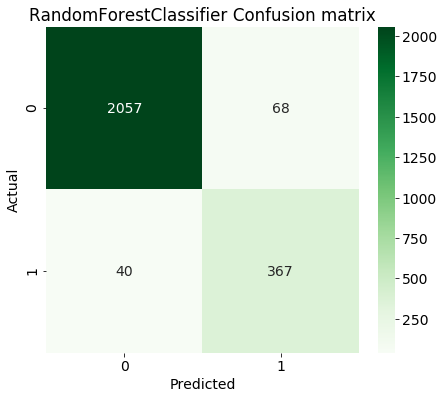

In [55]:
# RandomForestClassifier, feature importance, and confusion matrix
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train_both, y_train_both)
predicted = clf_forest.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(clf_forest, X_train_both, y_train_both, scoring='f1', cv=cv)
print('Random Forest Classifier cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)), "\n")
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, clf_forest.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForestClassifier Confusion matrix")

Feature: 0, Score: 0.03026
Feature: 1, Score: 0.01232
Feature: 2, Score: 0.01209
Feature: 3, Score: 0.01077
Feature: 4, Score: 0.00352
Feature: 5, Score: 0.02403
Feature: 6, Score: 0.04858
Feature: 7, Score: 0.02793
Feature: 8, Score: 0.02291
Feature: 9, Score: 0.03060
Feature: 10, Score: 0.12354
Feature: 11, Score: 0.03065
Feature: 12, Score: 0.06384
Feature: 13, Score: 0.17682
Feature: 14, Score: 0.19003
Feature: 15, Score: 0.09595
Feature: 16, Score: 0.07052
Feature: 17, Score: 0.00614
Feature: 18, Score: 0.00706
Feature: 19, Score: 0.00182
Feature: 20, Score: 0.00522
Feature: 21, Score: 0.00365
Feature: 22, Score: 0.00174


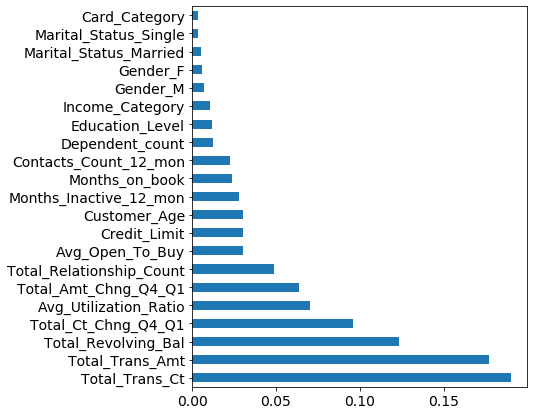

In [56]:
importance = clf_forest.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

feat_importances = pd.Series(clf_forest.feature_importances_, index=X_train_both.columns)
feat_importances.nlargest(21).plot(kind='barh')

For feature importance of fitting a **RandomForestClassifier**, the most important features are **Total_Trans_Amt** > **Total_Trans_Ct** > **Total_Revolving_Bal** > **Total_Ct_Chng_Q4_Q1**.

Random Forest Classifier cross validation score: 0.989 (0.003)
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2125
           1       0.89      0.84      0.87       407

    accuracy                           0.96      2532
   macro avg       0.93      0.91      0.92      2532
weighted avg       0.96      0.96      0.96      2532
 

Accuracy score:  0.9581358609794629 

AUROC:  0.9909969648793178 



Text(0.5, 1, 'RandomForestClassifier Confusion matrix')

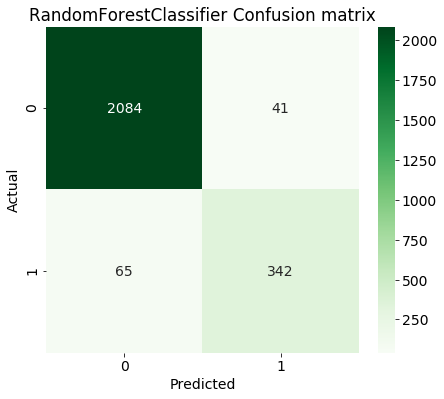

In [57]:
# try the train dataset with only oversampling
clf_forest_o = RandomForestClassifier()
clf_forest_o.fit(X_train_over, y_train_over)
predicted = clf_forest_o.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(clf_forest_o, X_train_over, y_train_over, scoring='f1', cv=cv)
print('Random Forest Classifier cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, clf_forest_o.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForestClassifier Confusion matrix")


Random Forest Classifier cross validation score: 0.930 (0.018)
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      2125
           1       0.73      0.96      0.83       407

    accuracy                           0.94      2532
   macro avg       0.86      0.95      0.89      2532
weighted avg       0.95      0.94      0.94      2532
 

Accuracy score:  0.9360189573459715 

AUROC:  0.9857459170400348 



Text(0.5, 1, 'RandomForestClassifier Confusion matrix')

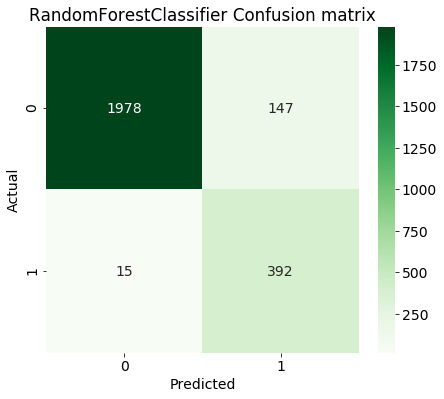

In [58]:
# try the train dataset with only undersampling
clf_forest_u = RandomForestClassifier()
clf_forest_u.fit(X_train_under, y_train_under)
predicted = clf_forest_u.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(clf_forest_u, X_train_under, y_train_under, scoring='f1', cv=cv)
print('Random Forest Classifier cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, clf_forest_u.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForestClassifier Confusion matrix")

Random Forest Classifier cross validation score: 0.998 (0.001)
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2125
           1       0.88      0.88      0.88       407

    accuracy                           0.96      2532
   macro avg       0.93      0.93      0.93      2532
weighted avg       0.96      0.96      0.96      2532
 

Accuracy score:  0.9609004739336493 

AUROC:  0.9883110276051452 



Text(0.5, 1, 'RandomForestClassifier Confusion matrix')

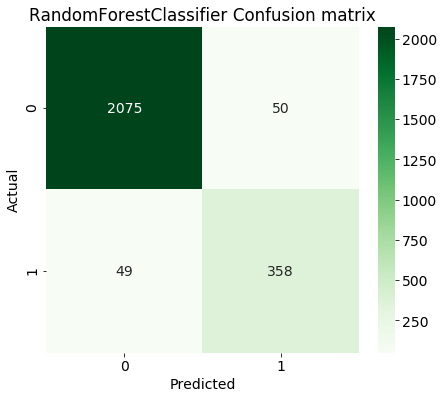

In [59]:
# try with only SMOTE
clf_forest_s = RandomForestClassifier()
clf_forest_s.fit(X_train_smote, y_train_smote)
predicted = clf_forest_s.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(clf_forest_s, X_train_smote, y_train_smote, scoring='roc_auc', cv=cv)
print('Random Forest Classifier cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, clf_forest_s.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForestClassifier Confusion matrix")

### GradientBoostingClassifier

GradientBoostingClassifier cross validation score: 0.927 (0.019) 

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2125
           1       0.82      0.94      0.88       407

    accuracy                           0.96      2532
   macro avg       0.91      0.95      0.93      2532
weighted avg       0.96      0.96      0.96      2532
 

Accuracy score:  0.9581358609794629 

AUROC:  0.9905292672351497 



Text(0.5, 1, 'GradientBoostingClassifier Confusion matrix')

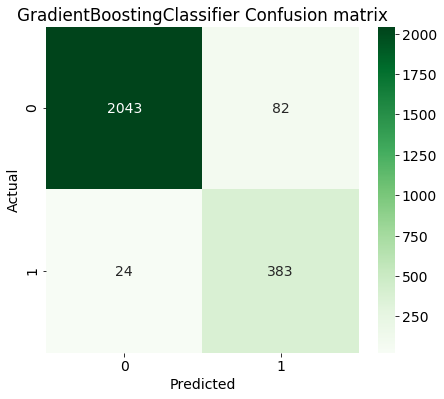

In [60]:
clf_g = GradientBoostingClassifier(loss='exponential', random_state=1)
clf_g.fit(X_train_both, y_train_both)
predicted = clf_g.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(clf_g, X_train_both, y_train_both, scoring='f1', cv=cv)
print('GradientBoostingClassifier cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)), "\n")
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, clf_g.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GradientBoostingClassifier Confusion matrix")

Feature: 0, Score: 0.01764
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00008
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00351
Feature: 6, Score: 0.05593
Feature: 7, Score: 0.01773
Feature: 8, Score: 0.01163
Feature: 9, Score: 0.00077
Feature: 10, Score: 0.18067
Feature: 11, Score: 0.00318
Feature: 12, Score: 0.02803
Feature: 13, Score: 0.18973
Feature: 14, Score: 0.42567
Feature: 15, Score: 0.06174
Feature: 16, Score: 0.00118
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00177
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00062
Feature: 21, Score: 0.00010
Feature: 22, Score: 0.00000


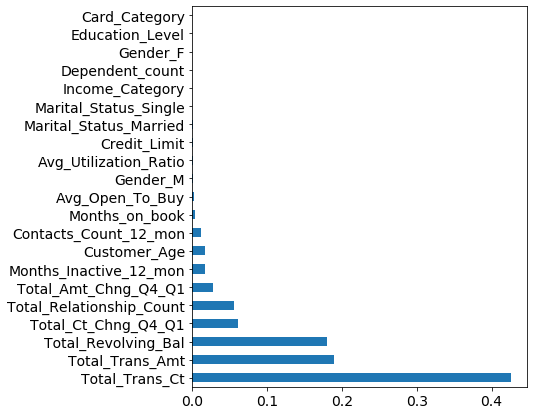

In [61]:
importance = clf_g.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

feat_importances = pd.Series(clf_g.feature_importances_, index=X_train_both.columns)
feat_importances.nlargest(21).plot(kind='barh')

For feature importance of fitting a **GradientBoostingClassifier**, the most important features are **Total_Trans_Ct** > **Total_Trans_Amt** > **Total_Revolving_Bal**.

### XGBClassifier

XGBClassifier cross validation score: 0.935 (0.013) 

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2125
           1       0.85      0.96      0.90       407

    accuracy                           0.97      2532
   macro avg       0.92      0.96      0.94      2532
weighted avg       0.97      0.97      0.97      2532
 

Accuracy score:  0.9656398104265402 

AUROC:  0.9931967047261164 



Text(0.5, 1, 'XGBClassifier Confusion matrix')

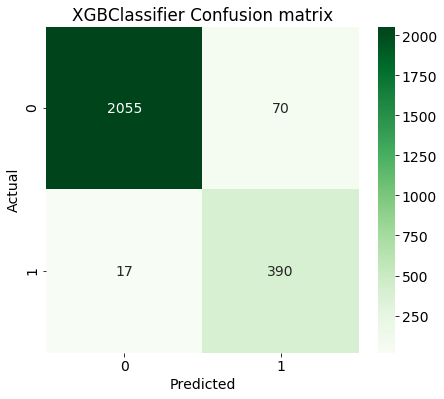

In [62]:
xgb = XGBClassifier()
xgb.fit(X_train_both, y_train_both)
predicted = xgb.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(xgb, X_train_both, y_train_both, scoring='f1', cv=cv)
print('XGBClassifier cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)), "\n")
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
print("AUROC: ", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]),"\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBClassifier Confusion matrix")

Feature: 0, Score: 0.03213
Feature: 1, Score: 0.00943
Feature: 2, Score: 0.00862
Feature: 3, Score: 0.00670
Feature: 4, Score: 0.01965
Feature: 5, Score: 0.01290
Feature: 6, Score: 0.08904
Feature: 7, Score: 0.03887
Feature: 8, Score: 0.02064
Feature: 9, Score: 0.01619
Feature: 10, Score: 0.14360
Feature: 11, Score: 0.02350
Feature: 12, Score: 0.03516
Feature: 13, Score: 0.06039
Feature: 14, Score: 0.31016
Feature: 15, Score: 0.03741
Feature: 16, Score: 0.01095
Feature: 17, Score: 0.04484
Feature: 18, Score: 0.04605
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01142
Feature: 21, Score: 0.01904
Feature: 22, Score: 0.00331


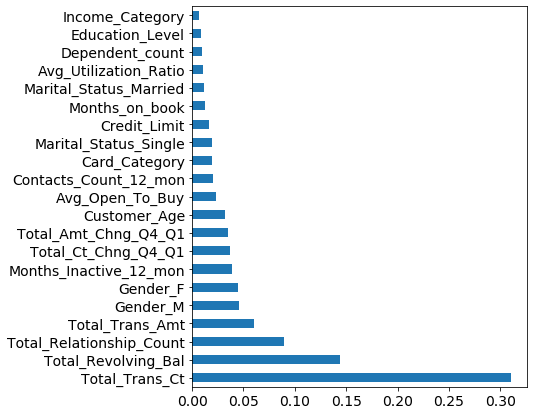

In [63]:
importance = xgb.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

feat_importances = pd.Series(xgb.feature_importances_, index=X_train_both.columns)
feat_importances.nlargest(21).plot(kind='barh')

For feature importance of fitting a **XGBClassifier**, the most important features are **Total_Trans_Ct** > **Total_Revolving_Bal** > **Total_Relationship_Count**.

### Ensemble

#### Hard

Ensemble cross validation score: 0.932 (0.017) 

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2125
           1       0.86      0.95      0.90       407

    accuracy                           0.97      2532
   macro avg       0.92      0.96      0.94      2532
weighted avg       0.97      0.97      0.97      2532
 

Accuracy score:  0.9664296998420221 



Text(0.5, 1, 'VotingClassifier (hard) Confusion matrix')

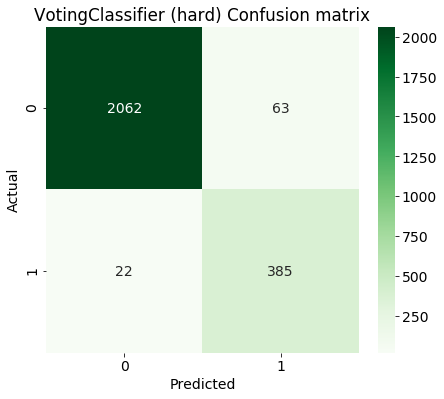

In [64]:
eclf = VotingClassifier(estimators=[('rf', clf_forest), ('clf_g', clf_g), ('xgbc', xgb)], voting='hard')
eclf.fit(X_train_both, y_train_both) 
predicted = eclf.predict(X_test) 
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(eclf, X_train_both, y_train_both, scoring='f1', cv=cv)
print('Ensemble cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)), "\n")
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VotingClassifier (hard) Confusion matrix")

#### soft

Ensemble cross validation score: 0.935 (0.011) 

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2125
           1       0.86      0.96      0.91       407

    accuracy                           0.97      2532
   macro avg       0.93      0.97      0.94      2532
weighted avg       0.97      0.97      0.97      2532
 

Accuracy score:  0.9684044233807267 



Text(0.5, 1, 'VotingClassifier (soft) Confusion matrix')

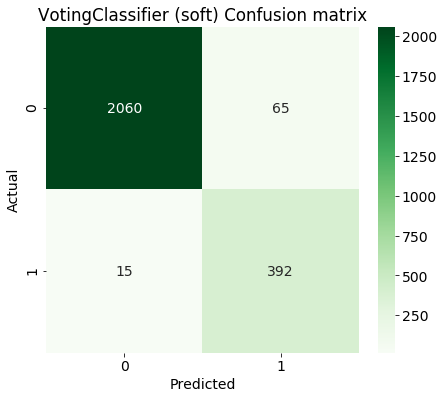

In [65]:
eclf = VotingClassifier(estimators=[('rf', clf_forest), ('clf_g', clf_g), ('xgbc', xgb)], voting='soft', weights=[1,2,3])
eclf.fit(X_train_both, y_train_both) 
predicted = eclf.predict(X_test) 
matrix = confusion_matrix(y_test, predicted)
scores = cross_val_score(eclf, X_train_both, y_train_both, scoring='f1', cv=cv)
print('Ensemble cross validation score: %.3f (%.3f)' % (mean(scores), std(scores)), "\n")
print("Classification report: \n", classification_report(y_test, predicted), "\n")  
print("Accuracy score: ", accuracy_score(y_test, predicted), "\n")
plt.figure(figsize = (7,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VotingClassifier (soft) Confusion matrix")

I used 6 methods to build model to predict bank churning in this project:
1. DecisionTreeClassifier
2. RandomForestClassifier
3. GradientBoostingClassifier
4. XGBClassifier
5. VotingClassifier (hard)
6. VotingClassifier (soft)

The best model to adopt would be **soft (based on the argmax of the sums of the predicted probabilities) ensemble method** using RandomForestClassifier, GradientBoostingClassifier, XGBClassifier with the weight of 1:2:3. The f-score is 0.91, and recall score is 0.96 using this model. 